<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<center><img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'></center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# Validation and cross-validation 

In this exercise you will implement a validation pipeline. 

At the end of the MSLE exercise you tested your model against the training and test datasets. As you should observe, there's a gap between the results. By validating your model, not only should you be able to anticipate the test time performance, but also have a method to compare different models.

Implement the basic validation method, i.e. a random split. Test it with your model from Exercise MSLE.

In [91]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2022-11-10 23:55:10--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/zey0gx91pna8irj/mieszkania.csv [following]
--2022-11-10 23:55:11--  https://www.dropbox.com/s/dl/zey0gx91pna8irj/mieszkania.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdfc259bdf73065bbe602580dc1.dl.dropboxusercontent.com/cd/0/get/BwhSwzgDGYwBK05JyTlYW5338b7lwpj3kLkv0FMGkkbYqNJYppt0o5iWEWHXOFm4fRSFrmB9bYfFPZ504yCaKJyUVfofc4rdqdxKqgUGwXCjr6mMajBrPxfgykpACBKKziPQ7MO_LysFrl4vT5cW6G11IKFWffDqTRhwrOad-kT2jg/file?dl=1# [following]
--2022-11-10 23:55:11--  https://ucdfc259bdf73065bbe602580dc1.dl.dropboxusercontent.com/cd/0/get/BwhSwzgDGYwBK05JyTlYW5338b7lwpj3kLkv0FMGkkbYqNJYppt0o5iWEWHXOFm4fRSFr

In [92]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn import preprocessing
from typing import Tuple

In [93]:
def load(name: str) -> Tuple[np.ndarray, np.array]:
    data = pd.read_csv(name)
    display(data)
    x = data.loc[:, data.columns != 'cena'].to_numpy()
    y = data['cena'].to_numpy()

    return x, y

In [94]:
x_train, y_train = load('mieszkania.csv')
x_test, y_test = load('mieszkania_test.csv')
print(len(x_train), len(x_test))

,m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
0,104,mokotowo,2,2,1940,1,780094
1,43,ochotowo,1,1,1970,1,346912
2,128,grodziskowo,3,2,1916,1,523466
3,112,mokotowo,3,2,1920,1,830965
4,149,mokotowo,3,3,1977,0,1090479
...,...,...,...,...,...,...,...
195,54,mokotowo,1,1,1992,1,378830
196,35,grodziskowo,1,1,1985,1,169832
197,107,grodziskowo,2,2,1935,0,473181
198,117,grodziskowo,3,2,1978,1,431076


,m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
0,71,wolowo,2,2,1912,1,322227
1,45,mokotowo,1,1,1938,0,295878
2,38,mokotowo,1,1,1999,1,306530
3,70,ochotowo,2,2,1980,1,553641
4,136,mokotowo,3,2,1939,1,985348
...,...,...,...,...,...,...,...
195,22,mokotowo,1,1,1985,1,146077
196,123,mokotowo,3,2,1986,1,857546
197,89,wolowo,2,2,1922,1,508225
198,40,wolowo,1,1,1959,0,208683


200 200


In [95]:
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(x_train[:, 1])
x_train[:, 1] = labelencoder.transform(x_train[:, 1])
x_test[:, 1] = labelencoder.transform(x_test[:, 1])

x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

In [96]:
#######################################################
# Implement the basic validation method,        # 
# compare MSLE on training, validation, and test sets #
#######################################################

def random_split(X, y, ratio):
  l = len(X)
  index = np.random.randint(0, l, int(l*ratio))
  rest_X = np.delete(X, index, axis=0)
  rest_y = np.delete(y, index, axis=0)
  return X[index], y[index], rest_X, rest_y

x_train, y_train, x_validation, y_validation = random_split(x_train, y_train, 0.7)

def msle(ys, ps):
  t = np.log(1 + ys) - np.log(1 + ps)
  return np.mean(t ** 2)

def mse(ys, ps):
  return np.mean((ys - ps) ** 2)
    

class Network(object):
  def __init__(self, l):
    self.w = np.random.rand(l+1)

  def normalize(self, X):
    ones = np.full(X.shape[0], 1).reshape(-1, 1)
    return np.concatenate((ones, (X - np.mean(X, axis=0)) / np.std(X, axis=0)), axis=1)
  
  def forward(self):
    return np.einsum("i,ji->j", self.w, self.X)
  
  def predict(self, X):
    return np.einsum("i,ji->j", self.w, self.normalize(X))

  def gradient(self, predictions, labels):
    return 2 * np.mean((predictions - labels).reshape(-1, 1) * self.X, axis=0)

  def SGD(self, lr, epochs, x_train, y_train):
    self.X = self.normalize(x_train)
    for i in range(epochs):
      self.w = self.w - lr * self.gradient(self.forward(), y_train)

def validate(nn, iters, x_train, y_train, x_validation, y_validation, x_test, y_test):
  print('Validation:')
  for i in range(iters):
    nn.SGD(0.0001, 1000, x_train, y_train)
    print(i, 'loss: ', msle(nn.predict(x_validation), y_validation))
  print('Test:')
  loss = msle(nn.predict(x_test), y_test)
  print(loss)
  return 100.0 - loss

nn = Network(x_train.shape[1])
validate(nn, 10, x_train, y_train, x_validation, y_validation, x_test, y_test)


Validation:
0 loss:  nan
1 loss:  nan
2 loss:  nan
3 loss:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


4 loss:  0.8000762501747578
5 loss:  0.34531661568505445
6 loss:  0.21063129937505007
7 loss:  0.1450960102994538
8 loss:  0.11078924165072464
9 loss:  0.09244573118076764
Test:
0.1890289226728305


99.81097107732717

To make the random split validation reliable, a huge chunk of training data may be needed. To get over this problem, one may apply cross-validaiton.

![alt-text](https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png)

Let's now implement the method. Make sure that:
* number of partitions is a parameter,
* the method is not limited to `mieszkania.csv`,
* the method is not limited to one specific model.

In [97]:
####################################
# Implement cross-validation # 
####################################
def cross_validate(nn, partitions, x_train, y_train, x_test, y_test):
  l = len(x_train)
  validation_results = []
  for i in range(partitions):
    index = range(l * i // partitions, l * (i+1) // partitions)
    curr_x_validation = x_train[index]
    curr_y_validation = y_train[index]
    curr_x_train = np.delete(x_train, index, axis=0)
    curr_y_train = np.delete(y_train, index, axis=0)
    validation_results.append(validate(nn, 10, curr_x_train, curr_y_train, curr_x_validation, curr_y_validation, x_test, y_test))
  print("Mean validation: ", np.mean(validation_results))

nn = Network(x_train.shape[1])
cross_validate(nn, 10, x_train, y_train, x_test, y_test)

Validation:
0 loss:  nan
1 loss:  nan
2 loss:  nan
3 loss:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


4 loss:  1.472809298367651
5 loss:  0.6857768387157408
6 loss:  0.42748183411524315
7 loss:  0.29752123295519384
8 loss:  0.22239890139648363
9 loss:  0.1756116569067895
Test:
0.19793008658173647
Validation:
0 loss:  0.03291609973926725
1 loss:  0.02956057782017014
2 loss:  0.029004918365670675
3 loss:  0.02996731563938853
4 loss:  0.031667972629281844
5 loss:  0.033650128454069506
6 loss:  0.0356573415030151
7 loss:  0.03755441835991187
8 loss:  0.039277979940405765
9 loss:  0.04080607967646211
Test:
0.08532927656448802
Validation:
0 loss:  0.08362544944831282
1 loss:  0.08550912568377446
2 loss:  0.08690264474999045
3 loss:  0.08793274615913578
4 loss:  0.08869404457294637
5 loss:  0.08925454314144697
6 loss:  0.08966307951298048
7 loss:  0.08995521421467098
8 loss:  0.09015732591950601
9 loss:  0.09028934861634204
Test:
0.08661270043076322
Validation:
0 loss:  0.0641532382300177
1 loss:  0.06404855781575128
2 loss:  0.06416750313193202
3 loss:  0.0643657657146887
4 loss:  0.06457203

Recall that sometimes validation may be tricky, e.g. significant class imbalance, having a small number of subjects, geographically clustered instances...

What could in theory go wrong here with random, unstratified partitions? Think about potential solutions and investigate the data in order to check whether these problems arise here.

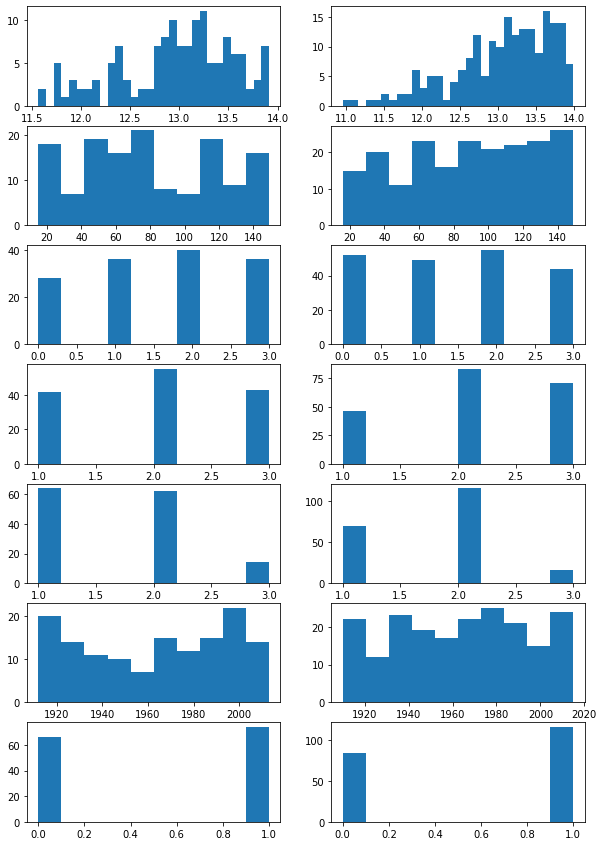

In [98]:
##############################
# Investigate the data #
##############################
import matplotlib.pyplot as plt

fig, axs = plt.subplots(7, 2, figsize=(10,15))
n_bins = 30
axs[0][0].hist(np.log(y_train), bins=n_bins)
axs[0][1].hist(np.log(y_test), bins=n_bins)

for i in range(6):
  axs[1 + i][0].hist(x_train[:, i])
  axs[1 + i][1].hist(x_test[:, i])